In [871]:
# 오류 무시
import warnings
warnings.filterwarnings('ignore')

# 머신러닝 돌려보기

In [872]:
import pandas as pd
df_PCOS = pd.read_csv('../Data/pcos_remove.csv')
df_PCOS.head(3)

,PCOS,Age,Pulse rate,Cycle length,aborptions,Weight gain,hair growth,Skin darkening,Pimples,Fast food
0,0.0,28.0,78.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,36.0,74.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,33.0,72.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0


In [873]:
df_PCOS.dtypes

PCOS              float64
Age               float64
Pulse rate        float64
Cycle length      float64
aborptions        float64
Weight gain       float64
hair growth       float64
Skin darkening    float64
Pimples           float64
Fast food         float64
dtype: object

In [874]:
df_PCOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PCOS            539 non-null    float64
 1   Age             539 non-null    float64
 2   Pulse rate      539 non-null    float64
 3   Cycle length    539 non-null    float64
 4   aborptions      539 non-null    float64
 5   Weight gain     539 non-null    float64
 6   hair growth     539 non-null    float64
 7   Skin darkening  539 non-null    float64
 8   Pimples         539 non-null    float64
 9   Fast food       539 non-null    float64
dtypes: float64(10)
memory usage: 42.2 KB


# 머신러닝 모델 돌려보기

In [875]:
# Target을 제외한 나머지 데이터 추출
x=df_PCOS.iloc[:,1:]
x.head(3)

,Age,Pulse rate,Cycle length,aborptions,Weight gain,hair growth,Skin darkening,Pimples,Fast food
0,28.0,78.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0
1,36.0,74.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.0,72.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0


In [876]:
# Target인 PCOS (Y/N) 추출하기
y=df_PCOS.iloc[:,0]
y

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
534    0.0
535    0.0
536    0.0
537    0.0
538    1.0
Name: PCOS, Length: 539, dtype: float64

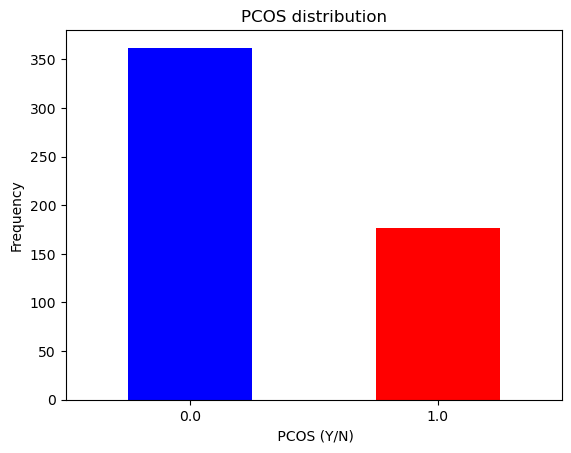

In [877]:
import matplotlib.pyplot as plt
# 차트화 0과 1의 비율
PCOS_count = pd.value_counts(y, sort = True)

PCOS_count.plot(kind = 'bar', rot=0, color=['blue', 'red'])

plt.title("PCOS distribution")
plt.xlabel(" PCOS (Y/N)")
plt.ylabel("Frequency")
plt.show()

### 0과 1의 개수가 균형있지 않아서 stratify로 훈련용 데이터와 데스트용 데이터의 균형을 맞춰줘야 한다.

### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [878]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(x, y, test_size=0.2, stratify=y)

In [879]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target)

In [880]:
# 세트 별 크기
print('Train :', sub_input.shape)
print('Valid :', val_input.shape)
print('Test :', test_input.shape)

Train : (344, 9)
Valid : (87, 9)
Test : (108, 9)


### 여러 모델들을 통해 가장 점수가 좋은 모델을 찾아본다.

## 사용해 볼 모델
- Decision Tree Regression  
- Random Forest Regression  
- Gradient Boosting Regression (GBR)  
- logistic Regression  

# Decision Tree Regression 

In [881]:
# 교차검증을 위한 import
import numpy as np
from sklearn.model_selection import cross_validate

In [882]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(sub_input, sub_target)


print('Train score :', dtr.score(sub_input, sub_target))
print('Valid score :', dtr.score(val_input, val_target))

scores = cross_validate(dtr, train_input, train_target, return_train_score=True)
print('-'*40)
print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))


Train score : 0.9846250111736837
Valid score : 0.06896551724137923
----------------------------------------
교차검증 Train score : 0.9908768699341888
교차검증 Test score: -0.09976829918753687


# Random Forest Regression 

In [883]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(sub_input, sub_target)
print('Train score :', rfr.score(sub_input, sub_target))
print('Valid score :', rfr.score(val_input, val_target))

scores = cross_validate(rfr, train_input, train_target, return_train_score=True)
print('-'*40)

print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))


Train score : 0.8969910532494549
Valid score : 0.43343222748064747
----------------------------------------
교차검증 Train score : 0.9055000919045014
교차검증 Test score: 0.3782408363186155


# Gradient Boosting Regression (GBR)  

In [884]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(sub_input, sub_target)
print('Train score :', gbr.score(sub_input, sub_target))
print('Valid score :', gbr.score(val_input, val_target))

scores = cross_validate(gbr, train_input, train_target, return_train_score=True)
print('-'*40)

print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))

Train score : 0.7190416807610288
Valid score : 0.5065859765394883
----------------------------------------
교차검증 Train score : 0.7395298038855607
교차검증 Test score: 0.4260368749877408


# Logistic Regression  

In [902]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(sub_input, sub_target)
print('Train score :', lr.score(sub_input, sub_target))
print('Valid score :', lr.score(val_input, val_target))

scores = cross_validate(lr, train_input, train_target, return_train_score=True)
print('-'*40)
#print(scores)
print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))

Train score : 0.8488372093023255
Valid score : 0.8735632183908046
----------------------------------------
{'fit_time': array([0.02800417, 0.02400589, 0.02500582, 0.02200508, 0.02200317]), 'score_time': array([0.0010004 , 0.00200009, 0.0010004 , 0.00100088, 0.00199986]), 'test_score': array([0.79310345, 0.86046512, 0.80232558, 0.88372093, 0.86046512]), 'train_score': array([0.86337209, 0.85217391, 0.87246377, 0.85217391, 0.85217391])}
교차검증 Train score : 0.8584715200539265
교차검증 Test score: 0.8400160384923817


다중회귀분석을 찾아봐야한다.
컬럼이 3개 이상이므로 다중회귀


# 가장 점수가 좋은 Logistic Regression을 모델로 사용하기로 결정

> 과대적합을 보이므로 Standardization, Regularization, Feature selection을 사용해야함

#### 이미 불필요한 Feature은 R에서 제거했으므로 Standardization와 Regularization을 사용하는 방향으로 생각했다.

In [886]:
# C 매개변수를 통한 규제
for c_num in [0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(C=c_num)
    lr.fit(sub_input, sub_target)

    print('C 매개변수의 값 :', c_num)
    print("Train Score : ", lr.score(sub_input, sub_target))
    print("Valid Score : ", lr.score(val_input, val_target))

    scores = cross_validate(lr, sub_input, sub_target)
    print('교차검증 Train Score :', np.mean(scores['test_score']))

    scores = cross_validate(lr, val_input, val_target)
    print('교차검증 Valid Score :', np.mean(scores['test_score']))

    print('-'*40)



C 매개변수의 값 : 0.01
Train Score :  0.7790697674418605
Valid Score :  0.7126436781609196
교차검증 Train Score : 0.7588235294117647
교차검증 Valid Score : 0.6555555555555556
----------------------------------------
C 매개변수의 값 : 0.1
Train Score :  0.8517441860465116
Valid Score :  0.8390804597701149
교차검증 Train Score : 0.8140238704177323
교차검증 Valid Score : 0.7470588235294118
----------------------------------------
C 매개변수의 값 : 1
Train Score :  0.8488372093023255
Valid Score :  0.8735632183908046
교차검증 Train Score : 0.8226768968456948
교차검증 Valid Score : 0.8392156862745097
----------------------------------------
C 매개변수의 값 : 10
Train Score :  0.8546511627906976
Valid Score :  0.8850574712643678
교차검증 Train Score : 0.8226342710997443
교차검증 Valid Score : 0.826797385620915
----------------------------------------
C 매개변수의 값 : 100
Train Score :  0.8488372093023255
Valid Score :  0.8735632183908046
교차검증 Train Score : 0.8168371696504689
교차검증 Valid Score : 0.8156862745098039
---------------------------------------

> C 매개변수의 값 : 0.1 일때 가장 좋은 수치를 보인다.

#### 이번에는 Standardization를 해보자.

In [887]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(sub_input)

sub_scaled = ss.transform(sub_input)
val_scaled = ss.transform(val_input)
test_scaled = ss.transform(test_input)

In [888]:
#교차검증
lr = LogisticRegression()
lr.fit(sub_scaled, sub_target)
scores = cross_validate(lr, sub_scaled, sub_target)
print('Train Score :', np.mean(scores['test_score']))

scores = cross_validate(lr, val_scaled, val_target)
print('Valid Score :', np.mean(scores['test_score']))

Train Score : 0.8255754475703325
Valid Score : 0.8045751633986928


> 정규화를 했을 때 점수가 더 안좋아졌다.

## Standardization을 한 후에 C 매개변수를 통한 규제를 해보았다.

In [889]:
# C 매개변수를 통한 규제
for c_num in [0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(C=c_num)
    lr.fit(sub_scaled, sub_target)

    print('C 매개변수의 값 :', c_num)
    print("Train Score : ", lr.score(sub_scaled, sub_target))
    print("Valid Score : ", lr.score(val_scaled, val_target))

    scores = cross_validate(lr, sub_scaled, sub_target)
    print('교차검증 Train Score :', np.mean(scores['test_score']))

    scores = cross_validate(lr, val_scaled, val_target)
    print('교차검증 Valid Score :', np.mean(scores['test_score']))

    print('-'*40)

C 매개변수의 값 : 0.01
Train Score :  0.8401162790697675
Valid Score :  0.8505747126436781
교차검증 Train Score : 0.8081415174765558
교차검증 Valid Score : 0.7235294117647058
----------------------------------------
C 매개변수의 값 : 0.1
Train Score :  0.8459302325581395
Valid Score :  0.8735632183908046
교차검증 Train Score : 0.8343137254901961
교차검증 Valid Score : 0.8503267973856209
----------------------------------------
C 매개변수의 값 : 1
Train Score :  0.8517441860465116
Valid Score :  0.8850574712643678
교차검증 Train Score : 0.8255754475703325
교차검증 Valid Score : 0.8045751633986928
----------------------------------------
C 매개변수의 값 : 10
Train Score :  0.8546511627906976
Valid Score :  0.8850574712643678
교차검증 Train Score : 0.8255754475703325
교차검증 Valid Score : 0.8045751633986928
----------------------------------------
C 매개변수의 값 : 100
Train Score :  0.8546511627906976
Valid Score :  0.8850574712643678
교차검증 Train Score : 0.8255754475703325
교차검증 Valid Score : 0.8045751633986928
--------------------------------------

> standardization를 한 후에 C 매개변수(C = 0.1)를 통한 규제를 줬을때 가장 좋은 점수를 받았다.

# Regularization

---
### L1규제(Lasso) 회귀
- 가중치의 절대값으로 규제하는 방법

In [890]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(sub_scaled, sub_target)
print('Train Score :', lasso.score(sub_scaled, sub_target))
print('Valid Score :', lasso.score(val_scaled, val_target))

Train Score : 0.0
Valid Score : -0.00010563142239106149


In [891]:
#최적값 찾기

train_score = []
valid_score = []

alpha_list = [0.001,0.01,0.1,1,10,100,1000]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(sub_scaled, sub_target)
    train_score.append(lasso.score(sub_scaled,sub_target))
    valid_score.append(lasso.score(val_scaled,val_target))

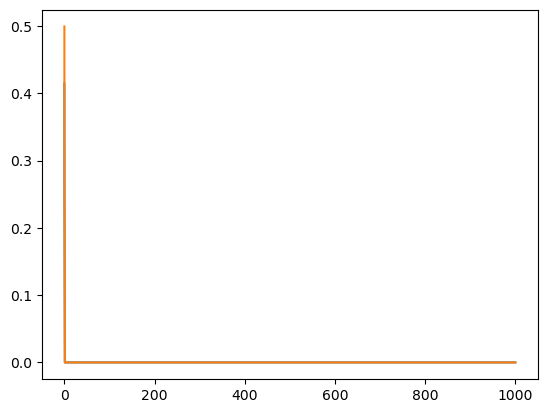

In [892]:
import matplotlib.pyplot as plt
plt.plot(alpha_list,train_score)
plt.plot(alpha_list,valid_score)
plt.show()

In [893]:
lasso = Lasso(alpha=0.001)
lasso.fit(sub_scaled, sub_target)
print('Train Score :', lasso.score(sub_scaled, sub_target))
print('Valid Score :', lasso.score(val_scaled, val_target))

Train Score : 0.4145324921390692
Valid Score : 0.4991617247502671


> 점수가 너무 낮아서 의미가 없어보인다.

### Ridge(L2 규제) 회귀
: 가중치의 제곱으로 규제하는 방법

In [894]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(sub_scaled,sub_target)
print('Train score :', ridge.score(sub_scaled,sub_target))
print('Valid score :', ridge.score(val_scaled,val_target))

Train score : 0.4145562661482426
Valid score : 0.49926618269000334


### 적절한 규제 강도(Hyper paramter) 찾기

In [895]:
train_score = []
valid_score = []

alpha_list = [0.001,0.01,0.1,1,10,100,1000]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(sub_scaled,sub_target)
    train_score.append(ridge.score(sub_scaled,sub_target))
    valid_score.append(ridge.score(val_scaled,val_target))

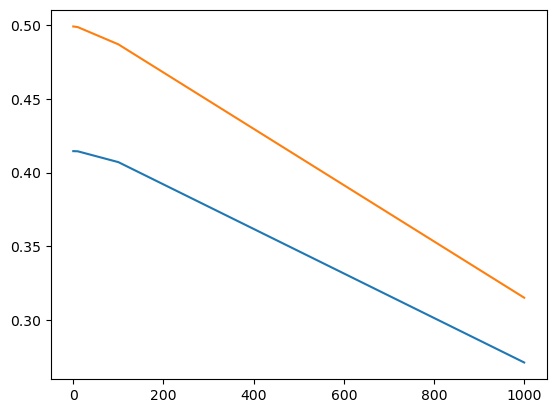

In [896]:
import matplotlib.pyplot as plt
plt.plot(alpha_list,train_score)
plt.plot(alpha_list,valid_score)
plt.show()

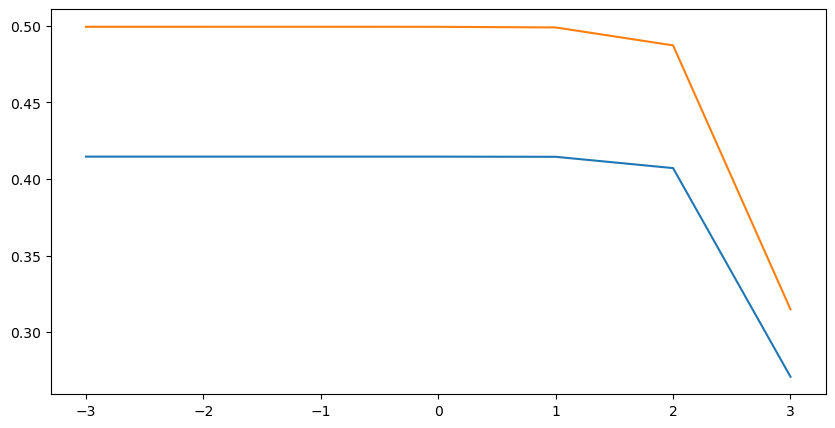

In [897]:
import numpy as np

plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),valid_score)#서로 제일 가까워지는 구간 끝자락 말고
plt.show()

alpha가 2인 경우가 train과 valid가 제일 가깝다. <-골디락스(Goldilocks) 포인트           
2는 100이다 (log)

In [898]:
ridge=Ridge(alpha=100)
ridge.fit(sub_scaled,sub_target)
print('Train score :', ridge.score(sub_scaled,sub_target))
print('Valid score :', ridge.score(val_scaled,val_target))

Train score : 0.407090564179719
Valid score : 0.4871570292468502


### 점수가 둘 다 너무 낮아서 의미가 없다.

### 결론: > standardization를 한 후에 C 매개변수를 통한 규제를 줬을때 가장 좋은 점수를 받았다. 

# 최종 테스트

In [899]:
# C 매개변수를 통한 규제
for c_num in [0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(C=c_num)
    lr.fit(sub_scaled, sub_target)

    print('C 매개변수의 값 :', c_num)
    print("Train Score : ", lr.score(sub_scaled, sub_target))
    print("Test Score : ", lr.score(test_scaled, test_target))
    print('-'*40)

C 매개변수의 값 : 0.01
Train Score :  0.8401162790697675
Test Score :  0.8518518518518519
----------------------------------------
C 매개변수의 값 : 0.1
Train Score :  0.8459302325581395
Test Score :  0.8611111111111112
----------------------------------------
C 매개변수의 값 : 1
Train Score :  0.8517441860465116
Test Score :  0.8611111111111112
----------------------------------------
C 매개변수의 값 : 10
Train Score :  0.8546511627906976
Test Score :  0.8611111111111112
----------------------------------------
C 매개변수의 값 : 100
Train Score :  0.8546511627906976
Test Score :  0.8611111111111112
----------------------------------------


# 답안지 확인

In [900]:
pred = lr.predict(test_scaled)

comparison = pd.DataFrame(
    {'예측값' : pred,
    '정답': test_target}
)
comparison.head(10)

,예측값,정답
264,0.0,0.0
373,0.0,1.0
397,0.0,0.0
96,0.0,1.0
485,0.0,0.0
100,0.0,0.0
389,0.0,0.0
245,0.0,0.0
37,0.0,0.0
536,0.0,0.0


In [901]:

user= [[27.0, 74.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]

# 유저 입력 값 데이터프레임 만들기
user = pd.DataFrame(user)

# 유저 입력 값 scaled 만들기
user_scaled= ss.transform(user)


pred = lr.predict(user_scaled)
#print(pred)
pred_proba = lr.predict_proba(user_scaled)
print(pred_proba)
print('분석결과 당신은 PCOS에 걸렸을 확률이 ', round(pred_proba[0][1] * 100, 2),'% 입니다.')



[[0.74501244 0.25498756]]
분석결과 당신은 PCOS에 걸렸을 확률이  25.5 % 입니다.


yes인 답안지를 넣어보고 확률값이 얼마나 나오나.   
그것에 대한 분포. 정답을 몇퍼센트로 맞췄는지 확인.  
 몇퍼센트부터 yes인지 확인 후 그것을 어플에서 위험도 판단기준으로 삼음.  
no도 마찬가지.   
최소값이 넘으면 위험한것 느낌.   